# k-means

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('iris.data.csv')

In [3]:
X = df.values[:, :4]
y = df.values[:,-1]

Реализация метода

In [4]:
run=1
centroid_1=X[0]
centroid_2=X[1]
centroid_3=X[2]
cluster_1=[]
cluster_2=[]
cluster_3=[]

In [5]:
while run :
    for iteration in X:
        dst_cent_1 = distance.euclidean(centroid_1, iteration)
        dst_cent_2 = distance.euclidean(centroid_2, iteration)
        dst_cent_3 = distance.euclidean(centroid_3, iteration)
        min_dst=min(dst_cent_1,dst_cent_2,dst_cent_3)
        if dst_cent_1 == min_dst:
            cluster_1.append(iteration)
        elif dst_cent_2 == min_dst:
            cluster_2.append(iteration)
        else:
            cluster_3.append(iteration)
    newCentroid1=np.mean(cluster_1,axis=0)
    
    newCentroid2=np.mean(cluster_2,axis=0)
    
    newCentroid3=np.mean(cluster_3,axis=0)
    if (newCentroid1==centroid_1).all()and(newCentroid2==centroid_2).all()and(newCentroid3==centroid_3).all():
        run=0
    else :
        centroid_1=newCentroid1[:]
        centroid_2=newCentroid2[:]
        centroid_3=newCentroid3[:]
        cluster_1.clear()
        cluster_2.clear()
        cluster_3.clear()
        


визуализация результатов 

In [6]:
print(len(cluster_1),len(cluster_2),len(cluster_3))

39 61 50


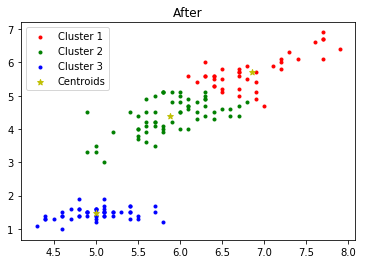

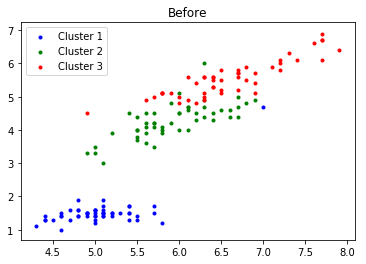

In [7]:
cluster_1=np.array(cluster_1)
cluster_2=np.array(cluster_2)
cluster_3=np.array(cluster_3)
c1 = plt.scatter(cluster_1[:, 0], cluster_1[:, 2], c='r', marker='.')
c2 = plt.scatter(cluster_2[:, 0], cluster_2[:, 2], c='g', marker='.')
c3 = plt.scatter(cluster_3[:, 0], cluster_3[:, 2], c='b', marker='.')

c4= plt.scatter(centroid_1[0], centroid_1[2], c='y', marker='*')
c4= plt.scatter(centroid_2[0], centroid_2[2], c='y', marker='*')
c4= plt.scatter(centroid_3[0], centroid_3[2], c='y', marker='*')

plt.legend([c1, c2, c3,c4], ['Cluster 1', 'Cluster 2', 'Cluster 3','Centroids'])
plt.title('After')
plt.show()

c1 = plt.scatter(X[0:51, 0], X[0:51, 2], c='b', marker='.')
c2 = plt.scatter(X[51:101, 0], X[51:101, 2], c='g', marker='.')
c3 = plt.scatter(X[101:151, 0], X[101:151, 2], c='r', marker='.')
plt.title('Before')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.show()

Подсчет доли верно определенныхклассов

In [8]:
def accuracy(cluster,iris):
    true=0
    for inter_cluster in cluster:
        for inter_iris in iris:
            if(inter_iris==inter_cluster).all():
                true=true+1
                break
    print((100/len(cluster)*true),"%")

In [9]:
setosa=X[0:50]
versicolor=X[50:100]
virginica=X[100:150]
accuracy(cluster_3,setosa)
accuracy(cluster_2,versicolor)
accuracy(cluster_1,virginica)

100.0 %
77.04918032786885 %
92.30769230769232 %
